# Decision Tree Classifier

This notebook uses a Decision Tree Classifier.

In [1]:
import utils
from sklearn.tree import DecisionTreeClassifier

# Load Data
X_train, y_train, X_test, y_test, class_names = utils.get_data_and_extract_features()

Loading features from cache...


Training Decision Tree...

=== Evaluation: Decision Tree ===
Accuracy: 59.96%

Classification Report:
              precision    recall  f1-score   support

       Apple       0.50      0.53      0.52       435
      Banana       0.63      0.68      0.65       484
      Grapes       0.58      0.64      0.61       426
       Lemon       0.46      0.48      0.47       408
       Mango       0.43      0.50      0.46       346
      Orange       0.65      0.59      0.62       872
   Pineapple       0.59      0.63      0.61       373
 Pomegranate       0.74      0.64      0.69       787
  Strawberry       0.65      0.70      0.67       419
  Watermelon       0.63      0.55      0.59       527

    accuracy                           0.60      5077
   macro avg       0.59      0.59      0.59      5077
weighted avg       0.61      0.60      0.60      5077



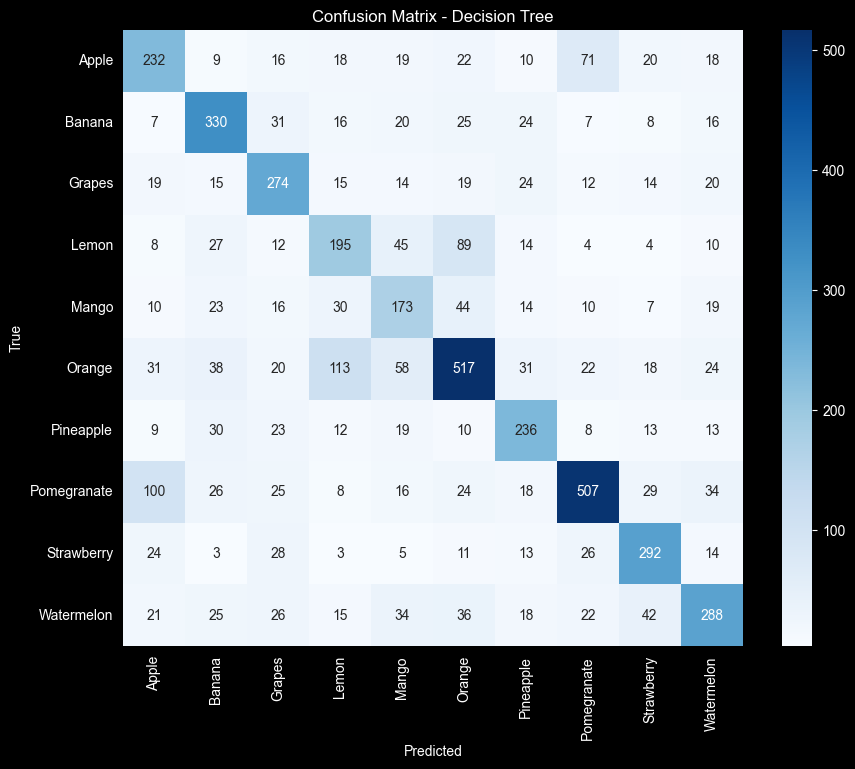

In [2]:
print("Training Decision Tree...")
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

utils.evaluate_model(model, X_test, y_test, class_names, model_name="Decision Tree")


=== Error Analysis: 5 Misclassified Samples ===


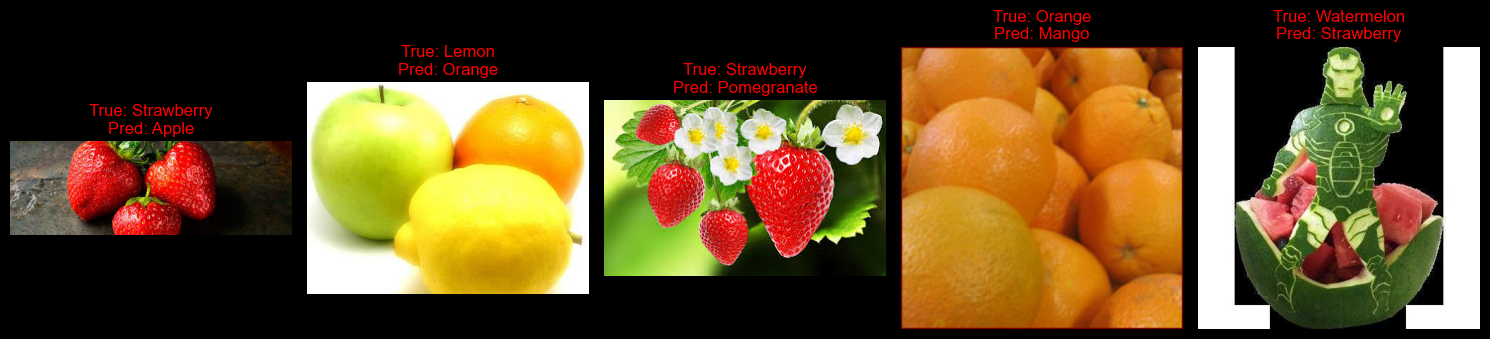

In [3]:
utils.visualize_model_errors(model, X_test, y_test, class_names)

## Analysis & Insights

### Key Metrics
- **Accuracy**: 59.96%
- **Macro Average F1-Score**: 0.59
- **Weighted Average F1-Score**: 0.60
- Single Decision Tree with default parameters

### Performance Analysis
- **Accuracy**: Low (<70%, significantly below acceptable threshold)
- **Best Classes**:
  - Pomegranate: 74% precision, 64% recall
  - Orange: 65% precision, 59% recall
  - Strawberry: 65% precision, 70% recall
- **Worst Classes**:
  - Mango: 43% precision, 50% recall (worst overall)
  - Lemon: 46% precision, 48% recall
  - Apple: 50% precision, 53% recall

### Error Analysis
- **Confusion Pairs**:
  - Orange → Lemon: 113 misclassifications (highest confusion)
  - Pomegranate → Apple: 100 misclassifications
  - Lemon → Orange: 89 misclassifications (bidirectional)
  - Apple → Pomegranate: 71 misclassifications (bidirectional)
  - Orange → Mango: 58 misclassifications
- **Visual Insights**: The Decision Tree shows severe overfitting to the training data, resulting in poor generalization. The 202 total Orange-Lemon confusions and 171 Apple-Pomegranate confusions indicate the tree created overly specific splits that don't capture general patterns. The model appears to have memorized noise in the training data rather than learning robust decision boundaries. All fruit classes show poor performance, with no class achieving above 74% precision, suggesting the tree structure is too complex and fragmented.

### Conclusion
The Decision Tree performs poorly at 59.96% accuracy, the worst among all tested models. This is expected behavior for a single decision tree on high-dimensional features (1280 dimensions from MobileNetV2), as trees tend to overfit without proper regularization. The model's inability to distinguish between any fruit pairs effectively (all classes <75% metrics) indicates it created overly specific rules. This result aligns with known Decision Tree limitations on complex feature spaces. The model would require significant hyperparameter tuning (max_depth, min_samples_split) or ensemble methods (Random Forest) to achieve acceptable performance. The poor results highlight why ensemble methods are preferred over single trees for image classification tasks.
